In [24]:
from pandas import read_csv
from matplotlib.pyplot import plot, show, hist
from rake_nltk import Rake 
from wordcloud import WordCloud
import matplotlib as plt
import numpy as np
# import rake



from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, Dense, Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from numpy import array
from sklearn.model_selection import train_test_split





In [3]:



df = read_csv('train-speach.csv',sep = ',')

df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      400 non-null    object
 1   tweets  400 non-null    object
 2   post    400 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [4]:
#preprocess
data  = df['tweets'].to_numpy()
lable = df['post'].to_numpy()
print(data.shape)

del df

(400,)


In [12]:
#stopword,extract keys
n = Rake()
n.extract_keywords_from_sentences(data)
stopword = n.get_ranked_phrases()
score = n.get_ranked_phrases_with_scores()

In [13]:
s = set(stopword[:402])

In [14]:
print(s)

{'khilafah nearly 2am', 'فكذبوه فأخذهم عذاب يوم الظلة إنه كان عذاب يوم عظيم', 'new scheme https ://', 'ارفعلك القبعه على هذا الاختيار https ://', 'rubble good work kurds lmao', 'الطائرة_المصرية ، فكيف ولماذا ؟', 'real ... https ://', 'riot police https ://', 'syrianalann فأي ردة ِ بعد هذه', 'saudi suicide bomber abu izz al', 'one court filing today', 'tu verrais les talafs se ranger du côté des premiers', 'ismail_yasa الفال لجميع الدول العربية إن شاء الله تختار نوابها وحكوماتها ،', 'indian army http ://', '2 vbied attacks near al', 'وزير الخارجية الصيني يكشف أبعاد تصاعد التوتر العسكري في بحر', 'ما أحلى صور الجهاد والمجاهدين وهم يهدمون قبرا أو يقتلون مرتدا أو ينفذون حدا أو يبنون جسرا أو يصنعون سلاحا أو يعلمون جاهلا', 'sultanmarshad انا انشر الشر ؟؟', 'yazidbinmuaoiah أعراض المسلمات من مخيمات اللاجئين تباع في لبنان ويسألوننا لماذا الذبح http ://', 'الفرق_شاسع https ://', 'الحملة_العالمية_لنصرة_الدولة_الإسلامية http ://', 'idf occupation forces shot', 'saa general issam zahredeen', 'shayb

In [15]:
comment_words = ''
for val in s:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
print(comment_words)

khilafah nearly 2am فكذبوه فأخذهم عذاب يوم الظلة إنه كان عذاب يوم عظيم new scheme https :// ارفعلك القبعه على هذا الاختيار https :// rubble good work kurds lmao الطائرة_المصرية ، فكيف ولماذا ؟ real ... https :// riot police https :// syrianalann فأي ردة ِ بعد هذه saudi suicide bomber abu izz al one court filing today tu verrais les talafs se ranger du côté des premiers ismail_yasa الفال لجميع الدول العربية إن شاء الله تختار نوابها وحكوماتها ، indian army http :// 2 vbied attacks near al وزير الخارجية الصيني يكشف أبعاد تصاعد التوتر العسكري في بحر ما أحلى صور الجهاد والمجاهدين وهم يهدمون قبرا أو يقتلون مرتدا أو ينفذون حدا أو يبنون جسرا أو يصنعون سلاحا أو يعلمون جاهلا sultanmarshad انا انشر الشر ؟؟ yazidbinmuaoiah أعراض المسلمات من مخيمات اللاجئين تباع في لبنان ويسألوننا لماذا الذبح http :// الفرق_شاسع https :// الحملة_العالمية_لنصرة_الدولة_الإسلامية http :// idf occupation forces shot saa general issam zahredeen shaybaali2 مزمز في حذاء المؤسس لحين انتهي من حديثي مع الارهابيين http :// مو

In [16]:
wc =WordCloud(background_color='white', colormap = 'binary',
      width = 800, height = 500).generate(comment_words)
plt.axis("off")
plt.imshow(wc)






TypeError: 'module' object is not callable

In [17]:
list_convert = ''.join([str(element) for element in s])
# print(list_convert)
vocub_size = len(list_convert) + 1
print(vocub_size)
embed_len = 5
maxlen = 10
# data0 = data.reshape(-1,1)
# print(np.shape(data))
m = Tokenizer()
m.fit_on_texts(s)
data1 = m.texts_to_sequences(s)
# print(np.shape(data1))
# lens = [len(row) for row in data1]
# hist(lens, bins=50)
# show()
data2 = pad_sequences(data1, maxlen=maxlen)

print(data2.shape)

15640
(400, 10)


Epoch 1/10
9/9 [==============================] - 6s 78ms/step - loss: 0.6717 - accuracy: 0.5868 - val_loss: 0.9045 - val_accuracy: 0.0000e+00
Epoch 2/10
9/9 [==============================] - 0s 13ms/step - loss: 0.6123 - accuracy: 0.6944 - val_loss: 1.3488 - val_accuracy: 0.0000e+00
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 0.5962 - accuracy: 0.6944 - val_loss: 1.2349 - val_accuracy: 0.0000e+00
Epoch 4/10
9/9 [==============================] - 0s 11ms/step - loss: 0.5779 - accuracy: 0.6944 - val_loss: 1.2024 - val_accuracy: 0.0000e+00
Epoch 5/10
9/9 [==============================] - 0s 11ms/step - loss: 0.5612 - accuracy: 0.7014 - val_loss: 1.1379 - val_accuracy: 0.0000e+00
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 0.5253 - accuracy: 0.7500 - val_loss: 1.3408 - val_accuracy: 0.0312
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 0.4668 - accuracy: 0.7951 - val_loss: 1.0489 - val_accuracy: 0.1250
Epoch 8/10

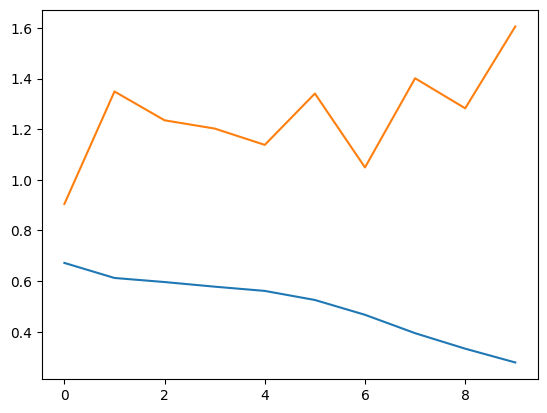

In [18]:
model  = Sequential()
x_train, x_test, y_train, y_test = train_test_split(data2, lable, test_size=0.2, shuffle=False)
model.add(Embedding(input_dim=vocub_size,output_dim=embed_len, input_length=maxlen))
model.add(SimpleRNN(units=32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
print(model.summary())
print(model.evaluate(x_test, y_test))

print(history.history)
plot(history.history['loss'])
plot(history.history['val_loss'])
show()
